# Optimal Growth

In [290]:
import tensorflow as tf
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm         # tqdm is a nice library to visualize ongoing loops
import datetime
# followint lines are used for indicative typing
from typing import Tuple
class Vector: pass

Kss 37.989253538152255


Text(0.5, 1.0, 'test')

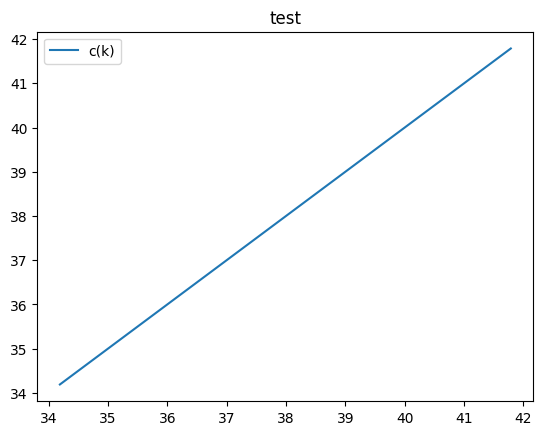

In [291]:
# Params
β = 0.99
α = 0.36
δ = 0.025
γ = 2.0
Z = np.array([0.99, 1.01])
P = np.array([[0.5, 0.5],[0.5, 0.5]])
Kss = (α/(1/β-1+δ))**(1/(1-α))
print('Kss', Kss)
kmin=Kss*0.9
kmax=Kss*1.1
kvec = np.linspace(kmin,kmax,100,dtype='float32')
layers = [
    tf.keras.layers.Dense(1, activation='linear', input_dim=2, bias_initializer='he_uniform'),
    #tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
]

perceptron = tf.keras.Sequential(layers)

def model(k:Vector, z:Vector)->Tuple[Vector]:
    z = z/σ/2.0
    k = (k-kmin)/(kmax-kmin)*2.0-1.0
    s = tf.concat([i[:,None] for i in [k,z]],axis=1)
    x = perceptron(s)
    sh = tf.sigmoid(x[:,0])
    return sh

shvec = model(kvec*0,kvec*0)
cvec = shvec*kvec
#plt.plot(kvec, kvec, label = 'k')
plt.plot(kvec, cvec, label = 'c(k)')
plt.legend()
plt.title('test')

In [292]:
def residuals(k:Vector, z:Vector, zp:Vector):
    n=tf.size(z)
    sh=model(k,z)
    c=sh*k
    kp=z*k**α+(1-δ)*k-c
    cp=model(kp,zp)*kp
    R=c**(-γ)-β*cp**(-γ)*(α*kp**(α-1)+(1-δ))
    return R

residuals(kvec,kvec/kvec,kvec/kvec)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-0.07380576, -0.07262981, -0.07145548, -0.07028301, -0.06911259,
       -0.0679448 , -0.06678022, -0.0656191 , -0.06446201, -0.06330919,
       -0.06216129, -0.06101853, -0.05988155, -0.05875063, -0.05762626,
       -0.05650865, -0.05539861, -0.05429615, -0.05320196, -0.05211617,
       -0.05103927, -0.04997157, -0.04891365, -0.04786555, -0.04682774,
       -0.04580054, -0.04478431, -0.04377919, -0.04278576, -0.04180393,
       -0.04083427, -0.03987688, -0.03893194, -0.03799977, -0.0370806 ,
       -0.03617446, -0.03528167, -0.03440233, -0.0335366 , -0.03268462,
       -0.03184649, -0.03102228, -0.03021212, -0.02941609, -0.02863421,
       -0.02786651, -0.02711307, -0.02637387, -0.02564892, -0.02493819,
       -0.0242417 , -0.02355936, -0.02289118, -0.02223699, -0.02159683,
       -0.02097056, -0.02035809, -0.01975932, -0.01917418, -0.01860248,
       -0.01804414, -0.01749894, -0.01696681, -0.01644757, -0.01594105,
       -0.015447

In [293]:
def J(n):
    z = tf.convert_to_tensor(np.random.choice([0.99, 1.01], n), dtype='float32')
    k = tf.random.uniform(shape=(n,),minval=kmin,maxval=kmax)
    e1 = tf.convert_to_tensor(np.random.choice([0.99, 1.01], n), dtype='float32')
    e2 = tf.convert_to_tensor(np.random.choice([0.99, 1.01], n), dtype='float32')
    R1 = residuals(k,z,e1)
    R2 = residuals(k,z,e2)
    R_squared = R1*R2
    return tf.reduce_mean(R_squared)

In [294]:
n = 5000
v = J(100000)
v.numpy()

0.001306302

In [295]:
θ = perceptron.trainable_variables
print(str(θ)[:1000])

[<tf.Variable 'dense_89/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-1.1414857],
       [ 0.4776634]], dtype=float32)>, <tf.Variable 'dense_89/bias:0' shape=(1,) dtype=float32, numpy=array([1.9758341], dtype=float32)>]


In [296]:
from tensorflow.keras.optimizers import Adam, SGD
variables = perceptron.trainable_variables
optimizer = Adam()

In [308]:
@tf.function
def training_step():
    
    with tf.GradientTape() as tape:
        xx = J(n)
        
    grads = tape.gradient(xx,θ)
    optimizer.apply_gradients(zip(grads,θ))
    
    return xx

def train_me(K):
    vals=[]
    for k in tqdm(tf.range(K)):
        val=training_step()
        vals.append(val.numpy())
    return vals

results = train_me(50000)

100%|████████████████████████████████████| 50000/50000 [02:28<00:00, 337.51it/s]


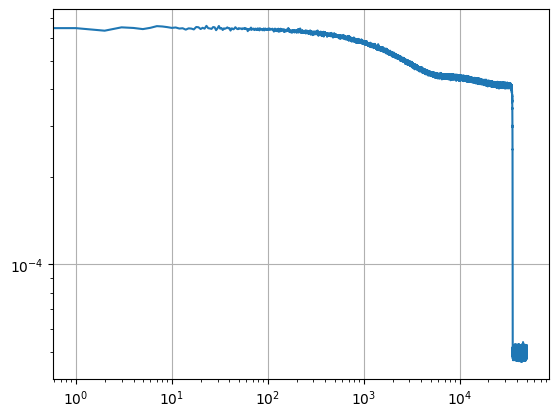

In [309]:
plt.plot(np.sqrt(results))
plt.xscale('log')
plt.yscale('log')
plt.grid()

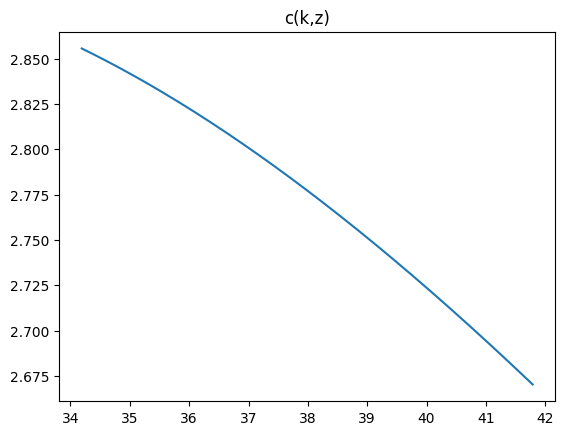

In [311]:
kvec = np.linspace(kmin,kmax,200,dtype='float32')
shvec = model(kvec, kvec/kvec)
plt.title('c(k,z)')
plt.plot(kvec,shvec*kvec)
plt.show()